# Linear Regression on Boston Housing Dataset

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s




I**mport the required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

**Load the Boston Housing DataSet from scikit-learn**

In [2]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

boston_dataset.keys()

C:\Users\Vishal.Shah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

**Load the data into pandas dataframe**

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**The target values is missing from the data. Create a new column of target values and add it to dataframe**

In [4]:
boston['MEDV'] = boston_dataset.target

**Data preprocessing**

In [5]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Data Visualization**

C:\Users\Vishal.shah.LAMINAAR\AppData\Local\Temp\ipykernel_20104\1097596011.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston['MEDV'])


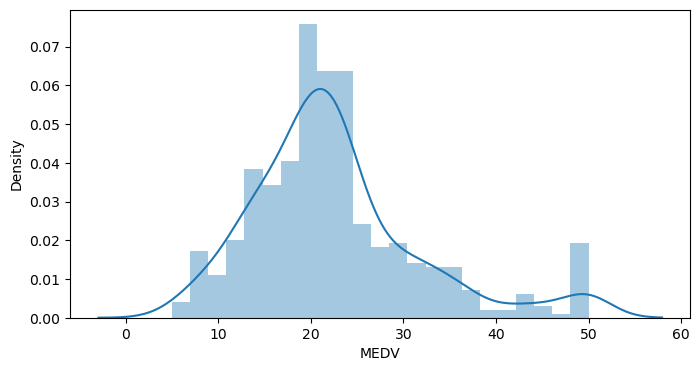

In [6]:
# set the size of the figure

plt.figure(figsize= (8,4))
# plot a histogram showing the distribution of the target values
sns.distplot(boston['MEDV'])
plt.show()

**Correlation matrix**

In [7]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2)

<AxesSubplot:>

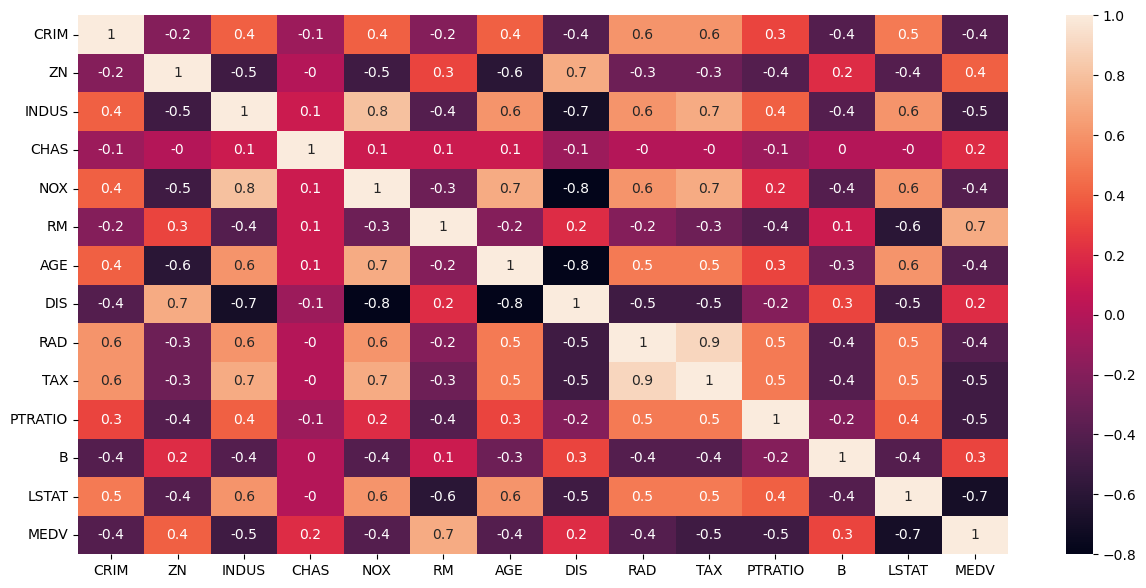

In [8]:
# use the heatmap function from seaborn to plot the correlation matrix
plt.figure(figsize= (15,7))
sns.heatmap(data= round(correlation_matrix,1), annot=True)

**Observations**




*   We can see that **MEDV** is strongly correlated to **LSTAT**, **RM**

*  **RAD** and **TAX** are stronly correlated, so we don't include this in our features together to avoid multi-colinearity




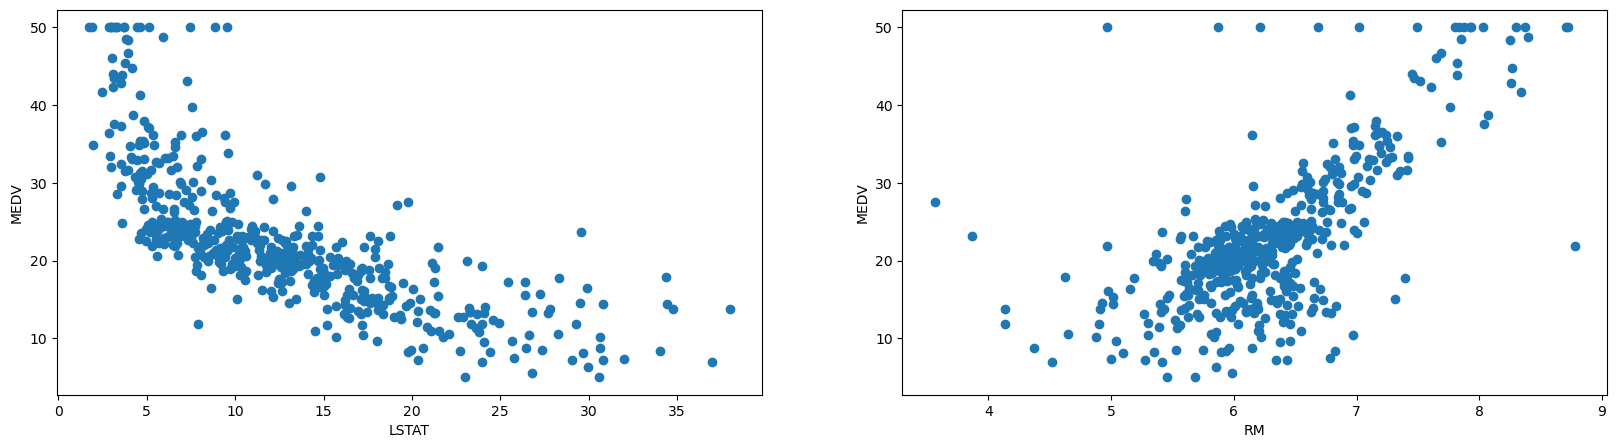

In [9]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
#     plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

**Prepare the data for training**

In [10]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM']) 
Y = boston['MEDV']

**Split the data into training and testing sets**

In [11]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


**Train the model using sklearn LinearRegression**

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [13]:
lin_model.score(X_train,Y_train)

0.6300745149331701

In [14]:
lin_model.score(X_test,Y_test)

0.6628996975186953

In [15]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


In [16]:
# Rsquare closer to 1 is good model
# RMSE lesser the better for model

In [17]:
from sklearn.metrics import mean_absolute_error
print("The model performance for training set")
print("--------------------------------------")
print("MAE",mean_absolute_error(Y_train, y_train_predict))
print("\n")
print("The model performance for testing set")
print("--------------------------------------")
print("MAE",mean_absolute_error(Y_test,y_test_predict))


The model performance for training set
--------------------------------------
MAE 4.031115615178024


The model performance for testing set
--------------------------------------
MAE 3.7913102133431047


In [18]:
# Lesser the MAE better for model

In [19]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error
print("The model performance for training set")
print("--------------------------------------")
print("MSE",mean_squared_error(Y_train, y_train_predict))
print("\n")
print("The model performance for testing set")
print("--------------------------------------")
print("MSE",mean_squared_error(Y_test,y_test_predict))


The model performance for training set
--------------------------------------
MSE 31.777227140320214


The model performance for testing set
--------------------------------------
MSE 26.392886822666085


In [20]:
# Lower the MSE better the model

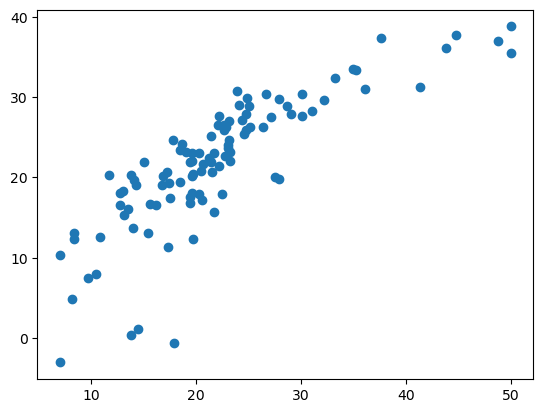

In [21]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

In [22]:
# PCA

In [23]:
a = boston_dataset.feature_names
a= np.append(a,'MDEV')

In [24]:
df= pd.DataFrame(np.c_[boston_dataset.data,boston_dataset.target],columns= a)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [25]:
X = boston_dataset.data
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [448]:
Y = boston_dataset.target

In [27]:
from sklearn.preprocessing import StandardScaler# get the features and label from the original dataframe
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [28]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 13)# perform PCA on the scaled data
df_pca = pca.fit_transform(X_scaled)
df_pca.transpose() # Component output


array([[-2.09829747, -1.45725167, -2.07459756, ..., -0.31236047,
        -0.27051907, -0.12580322],
       [ 0.77311275,  0.59198521,  0.5996394 , ...,  1.15524644,
         1.04136158,  0.76197805],
       [ 0.34294273, -0.69519931,  0.1671216 , ..., -0.40859759,
        -0.58545406, -1.294882  ],
       ...,
       [-0.03300036, -0.64080983, -0.48755672, ...,  0.11565634,
         0.0870124 ,  0.18432101],
       [ 0.01944023, -0.12579741,  0.13332653, ...,  0.28196407,
         0.30170082,  0.23273318],
       [ 0.36597533, -0.07071949, -0.0140218 , ...,  0.06247358,
         0.05436991,  0.01970872]])

In [29]:
# Loading of each feature on the components
pca.components_

array([[ 0.2509514 , -0.25631454,  0.34667207,  0.00504243,  0.34285231,
        -0.18924257,  0.3136706 , -0.32154387,  0.31979277,  0.33846915,
         0.20494226, -0.20297261,  0.30975984],
       [-0.31525237, -0.3233129 ,  0.11249291,  0.45482914,  0.21911553,
         0.14933154,  0.31197778, -0.34907   , -0.27152094, -0.23945365,
        -0.30589695,  0.23855944, -0.07432203],
       [ 0.24656649,  0.29585782, -0.01594592,  0.28978082,  0.12096411,
         0.59396117, -0.01767481, -0.04973627,  0.28725483,  0.22074447,
        -0.32344627, -0.3001459 , -0.26700025],
       [ 0.06177071,  0.12871159,  0.01714571,  0.81594136, -0.12822614,
        -0.28059184, -0.17520603,  0.21543585,  0.13234996,  0.10333509,
         0.28262198,  0.1684985 ,  0.06941441],
       [ 0.08215692,  0.32061699, -0.00781119,  0.08653094,  0.13685356,
        -0.4234472 ,  0.01669085,  0.09859225, -0.20413162, -0.13046057,
        -0.58400223, -0.34560695,  0.39456113],
       [-0.21965961, -0.323388

In [30]:
var_exp = pca.explained_variance_ratio_

In [31]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661,
       0.05056978, 0.04118124, 0.03046902, 0.02130333, 0.01694137,
       0.0143088 , 0.01302331, 0.00488533])

Let's create a dataframe of component loading against each field and identify the pattern

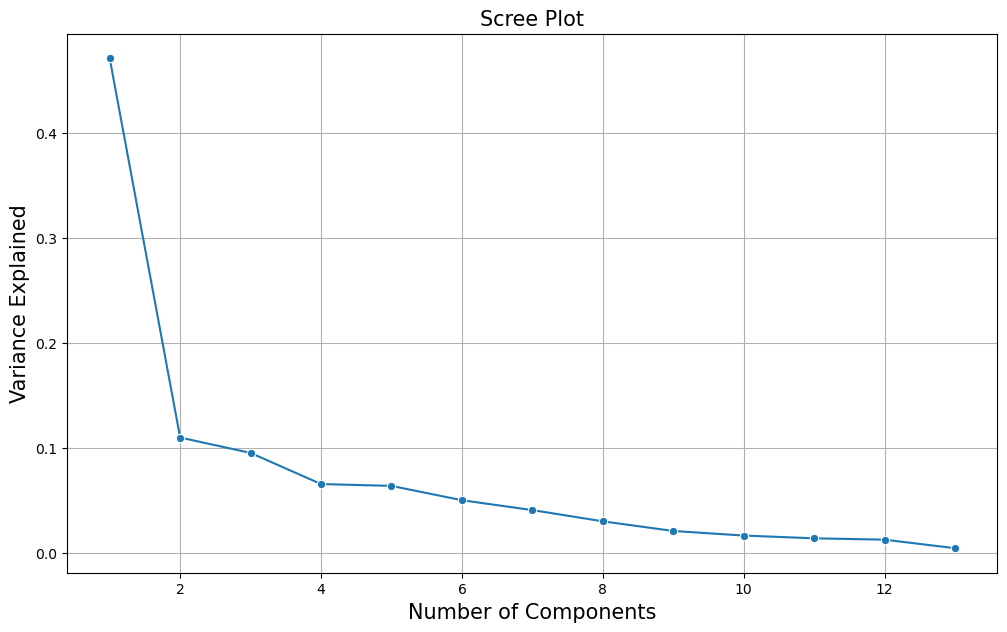

In [32]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [33]:
df_pca_loading = pd.DataFrame(pca.components_,columns= boston_dataset.feature_names)
df_pca_loading

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.250951,-0.256315,0.346672,0.005042,0.342852,-0.189243,0.313671,-0.321544,0.319793,0.338469,0.204942,-0.202973,0.309760
1,-0.315252,-0.323313,0.112493,0.454829,0.219116,0.149332,0.311978,-0.349070,-0.271521,-0.239454,-0.305897,0.238559,-0.074322
2,0.246566,0.295858,-0.015946,0.289781,0.120964,0.593961,-0.017675,-0.049736,0.287255,0.220744,-0.323446,-0.300146,-0.267000
3,0.061771,0.128712,0.017146,0.815941,-0.128226,-0.280592,-0.175206,0.215436,0.132350,0.103335,0.282622,0.168498,0.069414
4,0.082157,0.320617,-0.007811,0.086531,0.136854,-0.423447,0.016691,0.098592,-0.204132,-0.130461,-0.584002,-0.345607,0.394561
5,-0.219660,-0.323388,-0.076138,0.167490,-0.152983,0.059267,-0.071709,0.023439,-0.143194,-0.192934,0.273153,-0.803455,-0.053216
6,0.777607,-0.274996,-0.339576,0.074136,-0.199635,0.063940,0.116011,-0.103900,-0.137943,-0.314887,0.002324,0.070295,0.087011
7,0.153350,-0.402680,0.173932,-0.024662,0.080121,-0.326752,-0.600823,-0.121812,0.080358,0.082774,-0.317884,-0.004923,-0.424353
8,0.260390,0.358137,0.644416,-0.013728,-0.018522,0.047898,-0.067562,-0.153291,-0.470891,-0.176563,0.254428,-0.044898,-0.195221
9,0.019369,0.267527,-0.363532,-0.006182,0.231056,-0.431420,0.362779,-0.171213,0.021909,-0.035168,0.153430,-0.096515,-0.600711


In [34]:
# print the Cumulative explained variances
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 47.12960636  58.1547996   67.7133894   74.310121    80.73178205
  85.78876032  89.90688406  92.95378648  95.08411979  96.7782569
  98.20913665  99.51146723 100.        ]



In [35]:
pca.explained_variance_ratio_

array([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661,
       0.05056978, 0.04118124, 0.03046902, 0.02130333, 0.01694137,
       0.0143088 , 0.01302331, 0.00488533])

Text(0, 0.5, 'Explained variance (%)')

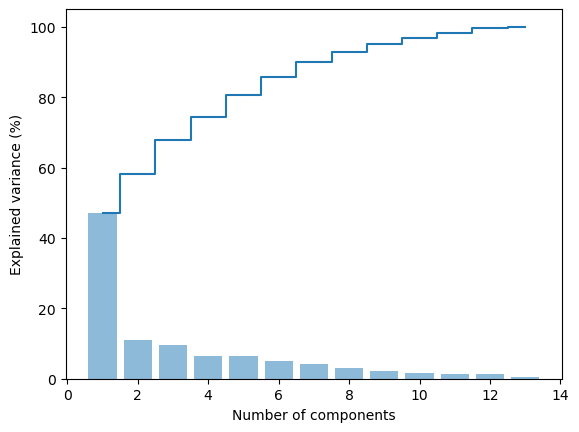

In [36]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) 
plt.step(range(1,components+1),np.cumsum(pca.explained_variance_ratio_ * 100),where='mid', label = 'Cumulative explained variance')
plt.bar(range(1,components+1), pca.explained_variance_ratio_*100 , alpha = 0.5, align = 'center', label = 'Individual explained variance')
# plt.step(range(10), cum_var_exp, )
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Text(0, 0.5, 'Explained variance (%)')

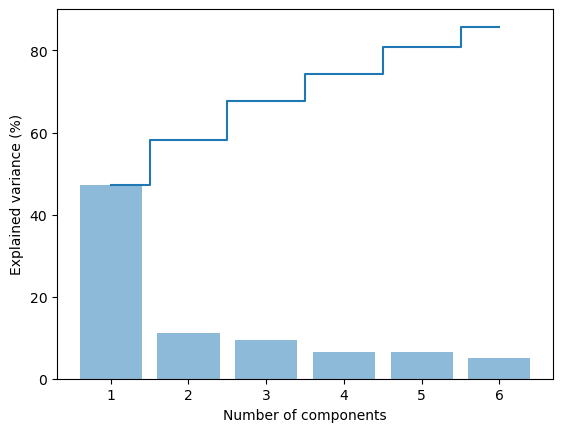

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)         # assuming we will consider components that provide 85% of information.

pca.fit_transform(X_scaled)
components = len(pca.explained_variance_ratio_)

plt.step(range(1,components+1),np.cumsum(pca.explained_variance_ratio_ * 100),where='mid', label = 'Cumulative explained variance')
plt.bar(range(1,components+1), pca.explained_variance_ratio_*100 , alpha = 0.5, align = 'center', label = 'Individual explained variance')
# plt.step(range(10), cum_var_exp, )
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [38]:
print('Top 4 most important features in each component')
for row in range(0,pca.components_.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca.components_[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca.components_[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['INDUS', 'NOX', 'TAX', 'RAD']
Component 1: ['CHAS', 'AGE', 'B', 'NOX']
Component 2: ['RM', 'ZN', 'CHAS', 'RAD']
Component 3: ['CHAS', 'PTRATIO', 'DIS', 'B']
Component 4: ['LSTAT', 'ZN', 'NOX', 'DIS']
Component 5: ['PTRATIO', 'CHAS', 'RM', 'DIS']


In [39]:
# Transforming all columns into 6 PCAs
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(506, 6)
[[-2.09829747  0.77311275  0.34294273 -0.89177403  0.42307036 -0.31533814]
 [-1.45725167  0.59198521 -0.69519931 -0.48745853 -0.19587567  0.26422321]
 [-2.07459756  0.5996394   0.1671216  -0.73920419 -0.93453406  0.44809462]
 ...
 [-0.31236047  1.15524644 -0.40859759 -0.78630409 -1.59518454  0.46794669]
 [-0.27051907  1.04136158 -0.58545406 -0.67813391 -1.41602419  0.48225947]
 [-0.12580322  0.76197805 -1.294882   -0.2883292  -0.89096917  0.40147353]]


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

_sc = StandardScaler()
_pca = PCA(n_components = 6)
_model = LinearRegression()
linear_regress_model = Pipeline([('std_scaler', _sc),('pca', _pca),('regressor', _model)])
linear_regress_model

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('regressor', LinearRegression())])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3) # train the model using the PCA components
linear_regress_model.fit(X_train,y_train)
# Score the training and testing model to see how it performs:

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('regressor', LinearRegression())])

In [42]:
linear_regress_model.score(X_train,y_train)
# accuracy:

0.7023127266973637

In [43]:
linear_regress_model.score(X_test,y_test)
# accuracy:

0.6725651236460044

In [44]:
y_train_predict = linear_regress_model.predict(X_train)

In [45]:
y_test_predict = linear_regress_model.predict(X_test)

In [46]:
print("The model performance for training set")

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
# r-squared score of the model
r2 = r2_score(y_train, y_train_predict)

print("RMSE",rmse)
print("R2",r2)
print("MSE",mean_squared_error(y_train, y_train_predict))
print("MAE",mean_absolute_error(y_train, y_train_predict))

The model performance for training set
RMSE 4.887015783331453
R2 0.7023127266973637
MSE 23.88292326653073
MAE 3.2177516889844413


In [47]:
print("The model performance for test set")

rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("RMSE",rmse)
print("R2",r2)
print("MSE",mean_squared_error(y_test, y_test_predict))
print("MAE",mean_absolute_error(y_test,y_test_predict))

The model performance for test set
RMSE 5.548408645970119
R2 0.6725651236460044
MSE 30.784838502675974
MAE 3.761150600865829


In [ ]:
# 3. Load "IRIS " datasets from SKlearn and follow this link for the data description (features and 
# target variable). Apply PCA on the dataset and select the first three principal components. Split 
# the dataset in train and test set (use your choice of splitting). Train a logistic regression model 
# and report the performance (use your choice of at least 4 performance metric).

In [449]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [450]:
X.shape, y.shape

((150, 4), (150,))

In [451]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [452]:
X = load_iris().data

In [453]:
Y = load_iris().target

In [454]:
names = load_iris().feature_names

In [455]:
load_iris().target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [456]:
from sklearn.preprocessing import StandardScaler# get the features and label from the original dataframe
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [457]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 4)# perform PCA on the scaled data
df_pca = pca.fit_transform(X_scaled)
df_pca.transpose() # Component output


array([[-2.26470281e+00, -2.08096115e+00, -2.36422905e+00,
        -2.29938422e+00, -2.38984217e+00, -2.07563095e+00,
        -2.44402884e+00, -2.23284716e+00, -2.33464048e+00,
        -2.18432817e+00, -2.16631010e+00, -2.32613087e+00,
        -2.21845090e+00, -2.63310070e+00, -2.19874060e+00,
        -2.26221453e+00, -2.20758770e+00, -2.19034951e+00,
        -1.89857200e+00, -2.34336905e+00, -1.91432300e+00,
        -2.20701284e+00, -2.77434470e+00, -1.81866953e+00,
        -2.22716331e+00, -1.95184633e+00, -2.05115137e+00,
        -2.16857717e+00, -2.13956345e+00, -2.26526149e+00,
        -2.14012214e+00, -1.83159477e+00, -2.61494794e+00,
        -2.44617739e+00, -2.10997488e+00, -2.20780890e+00,
        -2.04514621e+00, -2.52733191e+00, -2.42963258e+00,
        -2.16971071e+00, -2.28647514e+00, -1.85812246e+00,
        -2.55363840e+00, -1.96444768e+00, -2.13705901e+00,
        -2.06974430e+00, -2.38473317e+00, -2.39437631e+00,
        -2.22944655e+00, -2.20383344e+00,  1.10178118e+0

In [458]:
# Loading of each feature on the components
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [459]:
var_exp = pca.explained_variance_ratio_

In [460]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

Let's create a dataframe of component loading against each field and identify the pattern

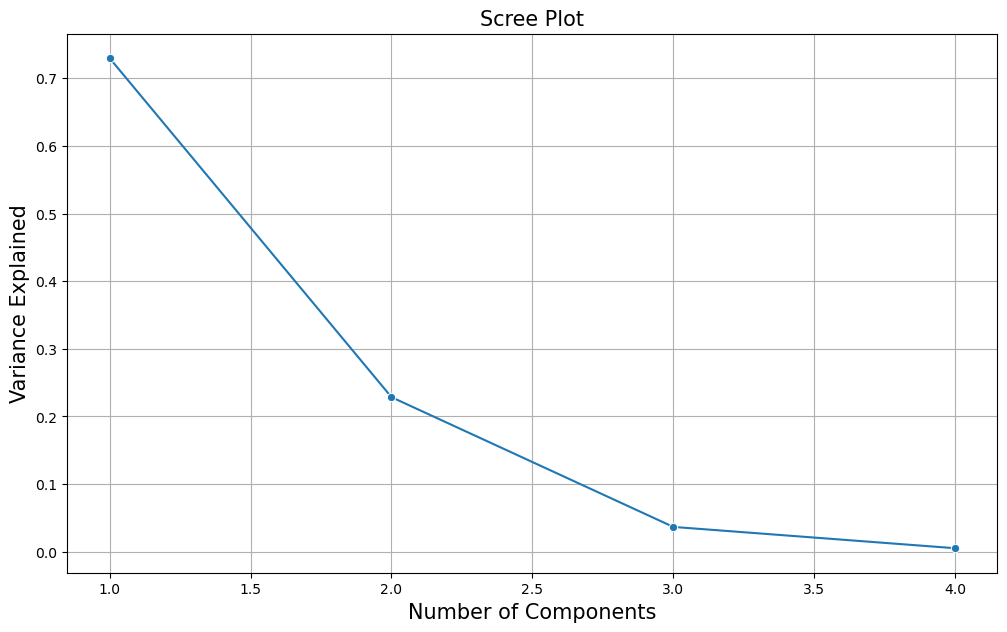

In [461]:
# Step 3 View Scree Plot to identify the number of components to be built
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [462]:
df_pca_loading = pd.DataFrame(pca.components_,columns= names)
df_pca_loading

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942
2,-0.719566,0.244382,0.142126,0.634273
3,-0.261286,0.123510,0.801449,-0.523597


In [51]:
# print the Cumulative explained variances
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 72.96244541  95.8132072   99.48212909 100.        ]



In [52]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

Text(0, 0.5, 'Explained variance (%)')

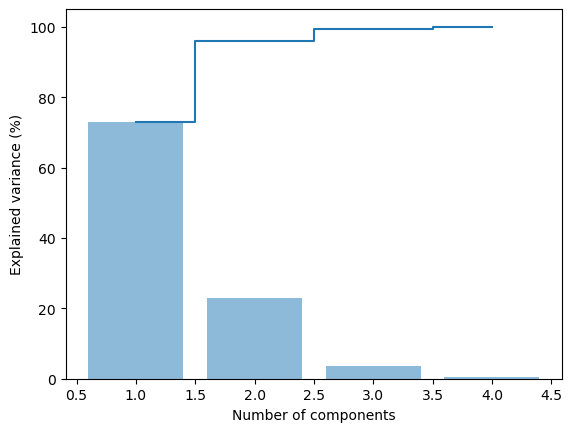

In [54]:
# plot a scree plot
import numpy as np

components = len(pca.explained_variance_ratio_) 
plt.step(range(1,components+1),np.cumsum(pca.explained_variance_ratio_ * 100),where='mid', label = 'Cumulative explained variance')
plt.bar(range(1,components+1), pca.explained_variance_ratio_*100 , alpha = 0.5, align = 'center', label = 'Individual explained variance')
# plt.step(range(10), cum_var_exp, )
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [86]:
import pandas as pd
df = pd.DataFrame(data = X, columns= names)

In [89]:
print('Top 3 most important features in each component')
for row in range(0,pca.components_.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca.components_[row]), 3)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca.components_[row])[temp])][:3]
    
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 3 most important features in each component
Component 0: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)']
Component 1: ['sepal width (cm)', 'sepal length (cm)', 'petal width (cm)']
Component 2: ['petal width (cm)', 'sepal width (cm)', 'petal length (cm)']
Component 3: ['petal length (cm)', 'sepal width (cm)', 'sepal length (cm)']


In [90]:
# Transforming all columns into 6 PCAs
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(150, 4)
[[-2.26470281e+00  4.80026597e-01 -1.27706022e-01 -2.41682039e-02]
 [-2.08096115e+00 -6.74133557e-01 -2.34608854e-01 -1.03006775e-01]
 [-2.36422905e+00 -3.41908024e-01  4.42014848e-02 -2.83770534e-02]
 [-2.29938422e+00 -5.97394508e-01  9.12901063e-02  6.59555596e-02]
 [-2.38984217e+00  6.46835383e-01  1.57381957e-02  3.59228133e-02]
 [-2.07563095e+00  1.48917752e+00  2.69682944e-02 -6.60818022e-03]
 [-2.44402884e+00  4.76441976e-02  3.35470401e-01  3.67755572e-02]
 [-2.23284716e+00  2.23148073e-01 -8.86954979e-02  2.46120962e-02]
 [-2.33464048e+00 -1.11532768e+00  1.45076864e-01  2.68592208e-02]
 [-2.18432817e+00 -4.69013561e-01 -2.53765567e-01  3.98992877e-02]
 [-2.16631010e+00  1.04369065e+00 -2.68681102e-01 -1.67313672e-02]
 [-2.32613087e+00  1.33078335e-01  9.37592444e-02  1.33483413e-01]
 [-2.21845090e+00 -7.28676165e-01 -2.30911237e-01 -2.42503814e-03]
 [-2.63310070e+00 -9.61506729e-01  1.80796084e-01  1.92155336e-02]
 [-2.19874060e+00  1.86005711e+00 -4.72900998e-01 -1.

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

_sc = StandardScaler()
_pca = PCA(n_components = 3)
_model = LogisticRegression()
logistic_regress_model = Pipeline([('std_scaler', _sc),('pca', _pca),('regressor', _model)])
logistic_regress_model

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=3)),
                ('regressor', LogisticRegression())])

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3) # train the model using the PCA components
logistic_regress_model.fit(X_train,y_train)
# Score the training and testing model to see how it performs:

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=3)),
                ('regressor', LogisticRegression())])

In [91]:
logistic_regress_model.score(X_train,y_train)
# accuracy:

0.9523809523809523

In [92]:
logistic_regress_model.score(X_test,y_test)
# accuracy:

0.9777777777777777

In [94]:
y_train_predict = logistic_regress_model.predict(X_train)

In [95]:
y_test_predict = logistic_regress_model.predict(X_test)

In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.94      0.92      0.93        36
           2       0.91      0.94      0.92        31

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105



In [104]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.95      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [105]:
# 4. Apply L1 or L2 regulariser on the logistic regression model developed using the same train and 
# test data used in Q3 and calculate performance of the new model. Compare performance of this 
# model with the performance reported in Q3. Explain the outcome.


In [144]:
_model = LogisticRegression(penalty='l1', solver ='saga')
logistic_regress_model = Pipeline([('std_scaler', _sc),('pca', _pca),('regressor', _model)])
logistic_regress_model.fit(X_train,y_train)
print(logistic_regress_model.score(X_train,y_train))
print(logistic_regress_model.score(X_test,y_test))
y_train_predict = logistic_regress_model.predict(X_train)
y_test_predict = logistic_regress_model.predict(X_test)
print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

0.9619047619047619
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      0.92      0.94        36
           2       0.91      0.97      0.94        31

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [145]:
_model = LogisticRegression(penalty='l1', solver ='liblinear')
logistic_regress_model = Pipeline([('std_scaler', _sc),('pca', _pca),('regressor', _model)])
logistic_regress_model.fit(X_train,y_train)
print(logistic_regress_model.score(X_train,y_train))
print(logistic_regress_model.score(X_test,y_test))
y_train_predict = logistic_regress_model.predict(X_train)
y_test_predict = logistic_regress_model.predict(X_test)
print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

0.9428571428571428
0.9111111111111111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.94      0.89      0.91        36
           2       0.88      0.94      0.91        31

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.86      0.86      0.86        14
           2       0.90      0.95      0.92        19

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [ ]:
# 5. Load "digits" datasets from SKlearn and print the dimension of the dataset. Apply PCA on the 
# dataset and select first three components. Print the dimension of modified dataset and visualise 
# the data using appropriate plotting tool/s

In [463]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

In [464]:
load_digits().keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [465]:
df = pd.DataFrame(load_digits().data,columns=load_digits().feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [466]:
df.shape

(1797, 64)

In [467]:
from sklearn.preprocessing import StandardScaler# get the features and label from the original dataframe
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [468]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 22)# perform PCA on the scaled data
df_pca = pca.fit_transform(X_scaled)
df_pca.transpose() # Component output


array([[ 1.91421482,  0.588987  ,  1.30203576, ...,  1.02259814,
         1.07605728, -1.25770445],
       [-0.95450135,  0.92465086, -0.31719593, ..., -0.14791302,
        -0.38089721, -2.22758821],
       [-3.9460253 ,  3.92475589,  3.02332369, ...,  2.469953  ,
        -2.45547554,  0.2836259 ],
       ...,
       [ 0.42466637, -0.11375495, -1.09899118, ...,  0.18756133,
         0.75811784, -1.11842908],
       [ 0.44072498,  0.90434966, -0.50726239, ...,  0.15629862,
        -0.12502588, -1.08813473],
       [ 0.57862552, -0.25008524,  0.03600373, ..., -0.26046127,
        -0.43371529, -0.29978183]])

In [469]:
# Loading of each feature on the components
pca.components_

array([[-1.11022302e-16, -1.82233904e-01, -2.85868013e-01, ...,
        -1.03197976e-01, -1.19810637e-01, -7.14936028e-02],
       [ 5.55111512e-17,  4.70270407e-02,  5.95647187e-02, ...,
        -2.42617650e-01, -1.65089419e-01, -7.13291700e-02],
       [ 5.55111512e-17,  2.35882243e-02, -5.67986700e-02, ...,
        -2.22795682e-02,  1.00365777e-01,  9.24456344e-02],
       ...,
       [ 2.62508216e-17,  9.75730515e-02, -2.46819289e-02, ...,
        -2.22697162e-02, -6.51307127e-02, -4.46976786e-02],
       [-1.26309553e-16,  6.07012067e-03, -1.16839741e-01, ...,
        -5.53153682e-02, -1.98208248e-01, -3.49693753e-01],
       [ 1.05900294e-16,  3.17224318e-02, -6.42173985e-03, ...,
        -1.14947624e-01, -1.27868219e-01, -1.38439123e-01]])

In [470]:
var_exp = pca.explained_variance_ratio_

In [471]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.0338938 , 0.02998219, 0.02932002,
       0.02781804, 0.02577052, 0.02275297, 0.02227142, 0.02165198,
       0.0191414 , 0.01775316, 0.01637938, 0.01596373, 0.01488914,
       0.01347672, 0.012711  ])

Let's create a dataframe of component loading against each field and identify the pattern

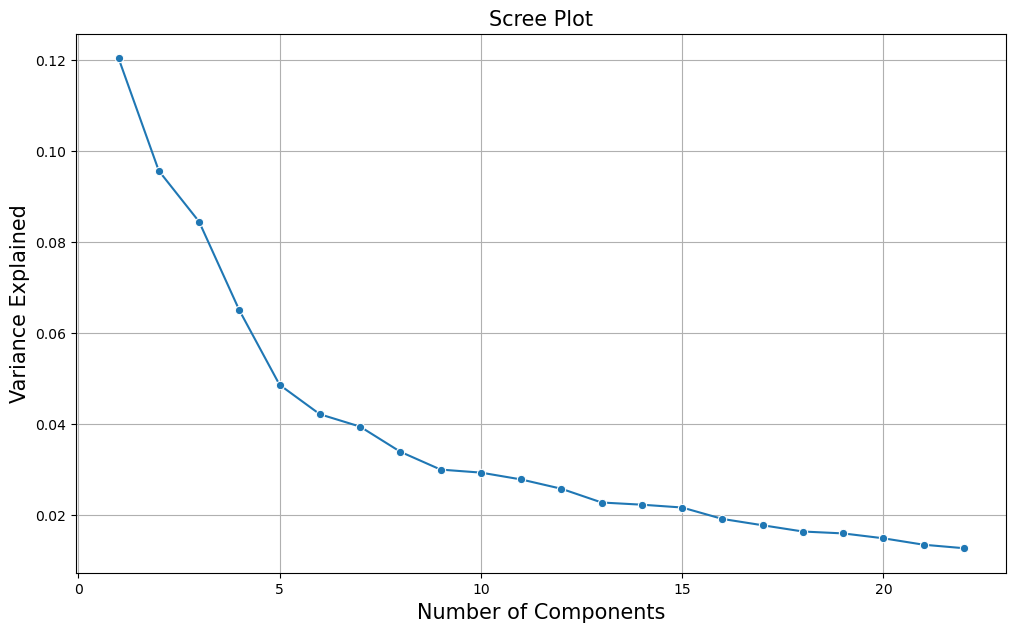

In [472]:
# Step 3 View Scree Plot to identify the number of components to be built
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [473]:
df_pca_loading = pd.DataFrame(pca.components_,columns= df.columns)
df_pca_loading

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,-1.110223e-16,-0.182234,-0.285868,-0.220370,0.025170,0.009497,0.052476,0.062695,-0.034707,-0.245534,...,-0.121247,-0.048771,0.001836,-0.160396,-0.279853,-0.194449,-0.017774,-0.103198,-0.119811,-0.071494
1,5.551115e-17,0.047027,0.059565,-0.020804,0.155903,0.274133,0.249733,0.145832,-0.001027,0.027619,...,-0.257752,-0.115002,0.004883,0.044498,0.081400,-0.009905,-0.251934,-0.242618,-0.165089,-0.071329
2,5.551115e-17,0.023588,-0.056799,-0.040464,-0.067065,-0.091090,-0.037579,-0.022546,0.002812,-0.050642,...,-0.023179,0.102993,0.011547,0.033895,-0.051273,-0.083464,-0.062455,-0.022280,0.100366,0.092446
3,3.816392e-17,0.178153,0.156128,0.167800,-0.000010,-0.000518,0.043700,0.008748,0.014403,0.124041,...,-0.157441,-0.130347,0.007788,0.186418,0.165487,0.171489,-0.154438,-0.252432,-0.160720,-0.118181
4,-5.551115e-17,-0.029976,-0.014669,0.043718,-0.139992,0.007995,0.211221,0.281815,-0.000630,0.006773,...,0.192442,0.248976,-0.051242,-0.039173,-0.033458,0.100367,-0.003774,0.094738,0.244012,0.231709
5,-8.673617e-17,0.231723,0.119873,-0.100389,-0.093478,-0.082193,0.030191,0.157871,-0.023332,0.064997,...,-0.000429,0.004020,0.126621,0.260507,0.109750,-0.086507,0.111833,0.057762,0.028940,0.016330
6,-1.561251e-17,0.108314,0.004745,-0.233707,0.039528,0.145985,0.036360,-0.098106,0.078251,0.124256,...,-0.081070,-0.083123,-0.016203,0.091575,-0.014849,-0.135309,0.172849,0.032169,-0.077622,-0.026414
7,-2.247009e-17,-0.125511,-0.006180,0.033389,-0.046141,-0.080359,-0.106775,-0.080034,0.021862,-0.024124,...,-0.130855,0.178411,0.057191,-0.110157,-0.040826,0.098843,0.055052,-0.034289,0.164535,0.350941
8,9.161508e-18,-0.213812,-0.120175,0.101879,0.093107,-0.063949,-0.037944,0.158183,0.150758,-0.017358,...,-0.026630,-0.188073,0.034139,-0.214507,-0.115401,0.115922,0.154258,0.027114,-0.144329,-0.219652
9,-3.122502e-17,0.059850,0.007662,-0.021588,0.005043,-0.164145,-0.187896,-0.065314,0.204846,0.208702,...,0.039406,0.026772,-0.023707,0.009654,0.013349,-0.105759,-0.100355,-0.036636,0.057166,0.029210


In [474]:
# print the Cumulative explained variances
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[12.0339161  21.5949705  30.03938539 36.5377933  41.39794804 45.61206772
 49.55415037 52.94353007 55.94174917 58.87375068 61.65555444 64.23260608
 66.5079032  68.73504484 70.90024304 72.81438347 74.5896991  76.22763685
 77.82401013 79.31292383 80.66059622 81.93169619]



In [475]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.0338938 , 0.02998219, 0.02932002,
       0.02781804, 0.02577052, 0.02275297, 0.02227142, 0.02165198,
       0.0191414 , 0.01775316, 0.01637938, 0.01596373, 0.01488914,
       0.01347672, 0.012711  ])

Text(0, 0.5, 'Explained variance (%)')

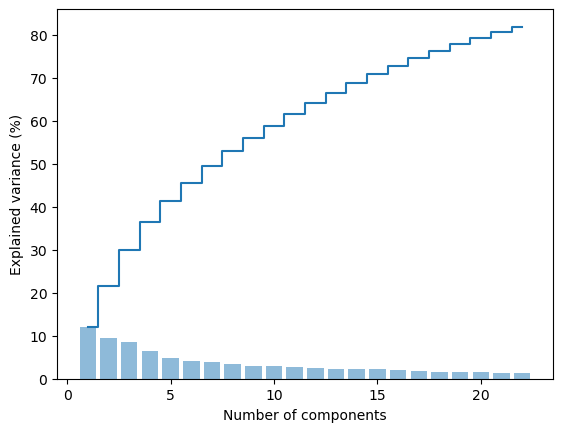

In [476]:
# plot a scree plot
import numpy as np

components = len(pca.explained_variance_ratio_) 
plt.step(range(1,components+1),np.cumsum(pca.explained_variance_ratio_ * 100),where='mid', label = 'Cumulative explained variance')
plt.bar(range(1,components+1), pca.explained_variance_ratio_*100 , alpha = 0.5, align = 'center', label = 'Individual explained variance')
# plt.step(range(10), cum_var_exp, )
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [477]:
# import pandas as pd
# df = pd.DataFrame(data = X, columns= names)

In [478]:
print('Top 22 most important features in each component')
for row in range(0,pca.components_.shape[0]):
    # get the indices of the top 20 values in each row
    temp = np.argpartition(-(pca.components_[row]), 20)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca.components_[row])[temp])][:20]
    
    # print the top 20 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 22 most important features in each component
Component 0: ['pixel_4_1', 'pixel_4_2', 'pixel_3_2', 'pixel_5_1', 'pixel_3_6', 'pixel_2_6', 'pixel_4_5', 'pixel_5_2', 'pixel_4_6', 'pixel_3_5', 'pixel_2_3', 'pixel_3_1', 'pixel_5_4', 'pixel_1_3', 'pixel_5_5', 'pixel_2_7', 'pixel_1_7', 'pixel_1_6', 'pixel_6_4', 'pixel_2_2']
Component 1: ['pixel_0_5', 'pixel_1_6', 'pixel_0_6', 'pixel_1_5', 'pixel_3_4', 'pixel_2_5', 'pixel_0_4', 'pixel_5_4', 'pixel_2_6', 'pixel_0_7', 'pixel_3_5', 'pixel_1_7', 'pixel_4_4', 'pixel_7_2', 'pixel_2_7', 'pixel_2_4', 'pixel_6_4', 'pixel_0_2', 'pixel_4_3', 'pixel_1_4']
Component 2: ['pixel_5_3', 'pixel_4_3', 'pixel_5_4', 'pixel_4_4', 'pixel_6_3', 'pixel_2_3', 'pixel_1_3', 'pixel_6_4', 'pixel_2_4', 'pixel_3_3', 'pixel_6_7', 'pixel_7_6', 'pixel_7_7', 'pixel_5_2', 'pixel_3_4', 'pixel_4_2', 'pixel_1_4', 'pixel_7_1', 'pixel_5_7', 'pixel_0_1']
Component 3: ['pixel_3_1', 'pixel_2_2', 'pixel_1_2', 'pixel_4_1', 'pixel_7_1', 'pixel_0_1', 'pixel_3_2', 'pixel_2_1', 'pixel_4_2'

In [240]:
# Transforming all columns into 6 PCAs
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(1797, 22)
[[ 1.91421393 -0.95450048 -3.94603806 ...  0.43945325  0.46310984
   0.54898621]
 [ 0.58898085  0.92463731  3.92475186 ... -0.04952271  0.9325542
  -0.2655065 ]
 [ 1.30203949 -0.31718809  3.02333593 ... -1.11324064 -0.52376646
   0.04151482]
 ...
 [ 1.02259611 -0.1479113   2.46997819 ...  0.17952133  0.1600279
  -0.253347  ]
 [ 1.07605505 -0.38090687 -2.45548745 ...  0.76741178 -0.14289405
  -0.42090675]
 [-1.25770243 -2.22758995  0.28362476 ... -1.12434133 -1.11151706
  -0.28101783]]


In [479]:
# 6. Classify the digit classes available in the dataset (use the modified dataset) using SVM with RBF 
# kernel. Select appropriate data splitting approach and performance metrics. Report the 
# performances and the used model hyper-parameters. 

In [628]:
import numpy as np
import matplotlib.pyplot as plt
# Import the digit data set
from sklearn import datasets
digitdata = datasets.load_digits()

# divide this data into features and labels
X = digitdata.data
y = digitdata.target


from sklearn.model_selection import train_test_split

#Split the data into 80% Training and 30% Testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,)

print(Xtrain.shape,ytrain.shape)
print (Xtest.shape,ytest.shape)


(105, 4) (105,)
(45, 4) (45,)


Training accuracy: 0.9968178202068417
Testing accuracy : 0.9962962962962963


C:\Users\Vishal.shah.LAMINAAR\AppData\Local\Temp\ipykernel_11512\614431436.py:13: UserWarning: You passed a edgecolor/edgecolors ('g') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='+', edgecolors='g', zorder=10)


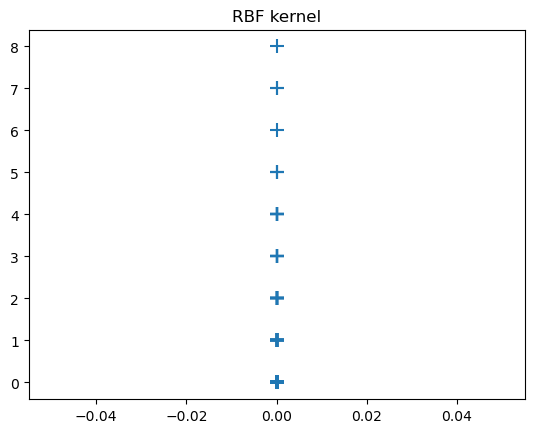

In [629]:
from sklearn import svm
from sklearn import metrics


svc_model = svm.SVC(kernel='rbf')

svc_model.fit(X,y)
plt.title('RBF kernel')
#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(y_train, svc_model.predict(X_train))))
print("Testing accuracy : {}".format(metrics.accuracy_score(y_test, svc_model.predict(X_test))))
#plotting support vectors
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='+', edgecolors='g', zorder=10)
plt.show()

In [630]:
y_train_predict = svc_model.predict(X_train)

In [631]:
y_test_predict = svc_model.predict(X_test)

In [632]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       0.99      1.00      1.00       124
           2       1.00      1.00      1.00       117
           3       0.99      1.00      1.00       124
           4       1.00      1.00      1.00       134
           5       0.99      0.99      0.99       130
           6       1.00      1.00      1.00       132
           7       1.00      1.00      1.00       121
           8       1.00      0.99      1.00       121
           9       0.99      0.98      0.99       122

    accuracy                           1.00      1257
   macro avg       1.00      1.00      1.00      1257
weighted avg       1.00      1.00      1.00      1257



In [633]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.98      1.00      0.99        58
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00        49
           7       0.98      1.00      0.99        58
           8       1.00      0.98      0.99        53
           9       1.00      0.98      0.99        58

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



In [634]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svc_model, param_grid, refit = True, cv= 10, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.111 total time=   1.5s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.103 total time=   1.4s
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.103 total time=   1.4s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.103 total time=   1.3s
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.103 total time=   1.4s
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.103 total time=   1.4s
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.103 total time=   1.4s
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.112 total time=   1.3s
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.112 total time=   1.4s
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.112 total time=   1.3s
[CV 1/10] END .....C=0.1, gamma=0.1, kernel=rbf;, score=0.111 total time=   1.2s
[CV 2/10] END .....C=0.1, gamma=0.1, kernel=rb

[CV 2/10] END ........C=10, gamma=1, kernel=rbf;, score=0.103 total time=   1.5s
[CV 3/10] END ........C=10, gamma=1, kernel=rbf;, score=0.103 total time=   1.5s
[CV 4/10] END ........C=10, gamma=1, kernel=rbf;, score=0.103 total time=   1.4s
[CV 5/10] END ........C=10, gamma=1, kernel=rbf;, score=0.103 total time=   1.5s
[CV 6/10] END ........C=10, gamma=1, kernel=rbf;, score=0.103 total time=   1.5s
[CV 7/10] END ........C=10, gamma=1, kernel=rbf;, score=0.103 total time=   1.4s
[CV 8/10] END ........C=10, gamma=1, kernel=rbf;, score=0.112 total time=   1.4s
[CV 9/10] END ........C=10, gamma=1, kernel=rbf;, score=0.112 total time=   1.3s
[CV 10/10] END .......C=10, gamma=1, kernel=rbf;, score=0.112 total time=   1.4s
[CV 1/10] END ......C=10, gamma=0.1, kernel=rbf;, score=0.111 total time=   1.3s
[CV 2/10] END ......C=10, gamma=0.1, kernel=rbf;, score=0.103 total time=   1.3s
[CV 3/10] END ......C=10, gamma=0.1, kernel=rbf;, score=0.103 total time=   1.3s
[CV 4/10] END ......C=10, ga

[CV 4/10] END ......C=1000, gamma=1, kernel=rbf;, score=0.103 total time=   1.5s
[CV 5/10] END ......C=1000, gamma=1, kernel=rbf;, score=0.103 total time=   1.5s
[CV 6/10] END ......C=1000, gamma=1, kernel=rbf;, score=0.103 total time=   1.4s
[CV 7/10] END ......C=1000, gamma=1, kernel=rbf;, score=0.103 total time=   1.5s
[CV 8/10] END ......C=1000, gamma=1, kernel=rbf;, score=0.112 total time=   1.4s
[CV 9/10] END ......C=1000, gamma=1, kernel=rbf;, score=0.112 total time=   1.5s
[CV 10/10] END .....C=1000, gamma=1, kernel=rbf;, score=0.112 total time=   1.5s
[CV 1/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.111 total time=   1.4s
[CV 2/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.103 total time=   1.5s
[CV 3/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.103 total time=   1.5s
[CV 4/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.103 total time=   1.4s
[CV 5/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.103 total time=   1.3s
[CV 6/10] END ....C=1000, ga

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [635]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [636]:
# print hyper-parameter 
print(grid.best_estimator_)

SVC(C=10, gamma=0.001)


Training accuracy: 1.0
Testing accuracy : 1.0


C:\Users\Vishal.shah.LAMINAAR\AppData\Local\Temp\ipykernel_11512\1742566251.py:10: UserWarning: You passed a edgecolor/edgecolors ('g') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='+', edgecolors='g', zorder=10)


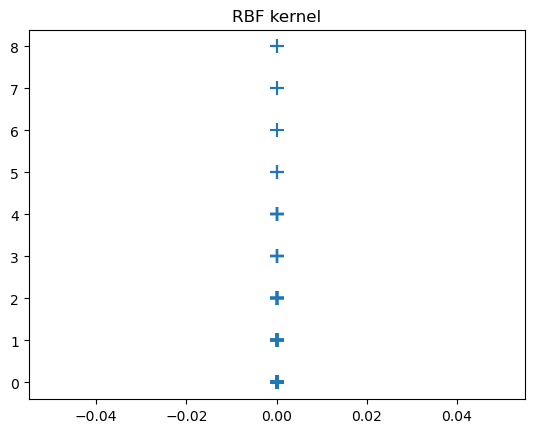

In [637]:
# using best parameters from hypertuning

svc_model = svm.SVC(kernel='rbf',C=10, gamma=0.001)

svc_model.fit(X,y)
plt.title('RBF kernel')
#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(y_train, svc_model.predict(X_train))))
print("Testing accuracy : {}".format(metrics.accuracy_score(y_test, svc_model.predict(X_test))))
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='+', edgecolors='g', zorder=10)
plt.show()

In [643]:
X = digitdata.data
y = digitdata.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [644]:
y_train_predict = svc_model.predict(X_train)

In [645]:
y_test_predict = svc_model.predict(X_test)

In [646]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       127
           2       1.00      1.00      1.00       122
           3       1.00      1.00      1.00       116
           4       1.00      1.00      1.00       122
           5       1.00      1.00      1.00       134
           6       1.00      1.00      1.00       126
           7       1.00      1.00      1.00       127
           8       1.00      1.00      1.00       121
           9       1.00      1.00      1.00       128

    accuracy                           1.00      1257
   macro avg       1.00      1.00      1.00      1257
weighted avg       1.00      1.00      1.00      1257



In [647]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00        59
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        55
           7       1.00      1.00      1.00        52
           8       1.00      1.00      1.00        53
           9       1.00      1.00      1.00        52

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



In [ ]:
# 7. Load "diabetes" datasets from SKlearn and print the dimension of the dataset. Apply tSNE method 
# to reduce dimension and select first three components. Plot the selected components using 
# appropriate visualisation technique.

In [496]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [497]:
X = diabetes.data
y = diabetes.target

In [512]:
df = pd.DataFrame(X,y,columns = diabetes.feature_names)
df.reset_index(inplace= True, drop=True)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [513]:
df.shape

(442, 10)

In [514]:
from sklearn.preprocessing import StandardScaler
standarized_data = StandardScaler().fit_transform(X)

In [515]:
from sklearn.manifold import TSNE
model = TSNE(n_components=3, random_state=0,perplexity=50, n_iter=5000)
tsne_data = model.fit_transform(standarized_data)
tsne_data

array([[ 4.2217355 ,  4.140221  ,  1.2495553 ],
       [-4.084664  , -0.1069193 , -1.9120344 ],
       [ 3.8716905 ,  4.535014  ,  0.6883042 ],
       ...,
       [ 2.4610002 ,  3.7442153 , -0.07536019],
       [-1.2828026 , -0.9177428 ,  3.4741042 ],
       [-3.4608424 , -1.5937581 , -3.558737  ]], dtype=float32)

In [516]:
tsne_concated = np.vstack((tsne_data.T,diabetes.target)).T
tsne_df = pd.DataFrame(data = tsne_concated , columns = ['dimension1','dimension2','dimension3','label'])
tsne_df

,dimension1,dimension2,dimension3,label
0,4.221735,4.140221,1.249555,151.0
1,-4.084664,-0.106919,-1.912034,75.0
2,3.871691,4.535014,0.688304,141.0
3,-1.273866,0.288218,2.790769,206.0
4,-1.689274,-1.633593,0.718449,135.0
...,...,...,...,...
437,3.805457,1.517073,0.785267,178.0
438,4.092041,0.365194,-3.360055,104.0
439,2.461000,3.744215,-0.075360,132.0
440,-1.282803,-0.917743,3.474104,220.0


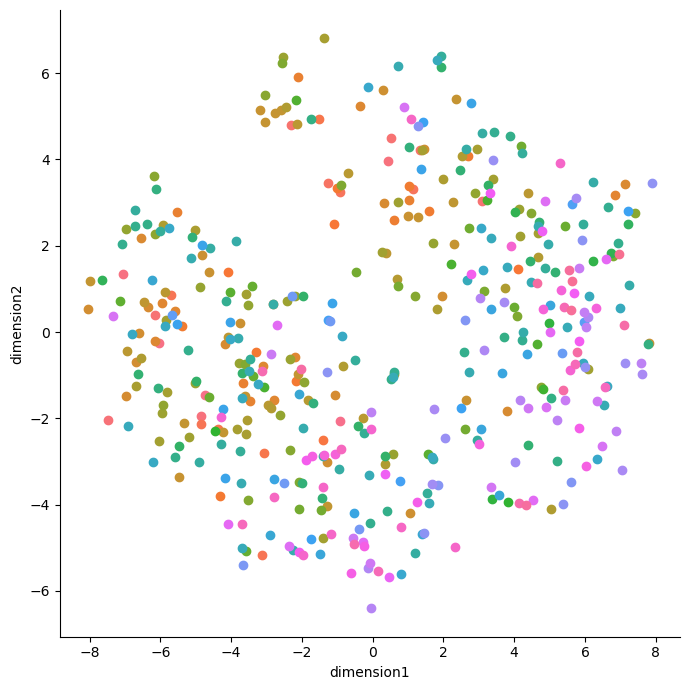

In [518]:
sns.FacetGrid(tsne_df, hue = 'label',height = 7).map(plt.scatter, 'dimension1','dimension2').add_legend()
plt.show()

In [ ]:
# 8. Create a model for detecting diabetes using SVM with a poly kernel. Select appropriate data 
# splitting approach and performance metrics. Report the performances and the used model hyperparameters.

In [576]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [577]:
X = diabetes.data
y = diabetes.target

In [578]:
X.shape,y.shape

((442, 10), (442,))

In [584]:
from sklearn.preprocessing import StandardScaler
standarized_data = StandardScaler().fit_transform(X)

In [585]:
from sklearn.model_selection import train_test_split

#Split the data into 80% Training and 30% Testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print(Xtrain.shape,ytrain.shape)
print (Xtest.shape,ytest.shape)


(105, 4) (105,)
(45, 4) (45,)


Training accuracy: 0.17475728155339806
Testing accuracy : 0.15789473684210525


C:\Users\Vishal.shah.LAMINAAR\AppData\Local\Temp\ipykernel_11512\437152738.py:9: UserWarning: You passed a edgecolor/edgecolors ('g') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='+', edgecolors='g', zorder=10)


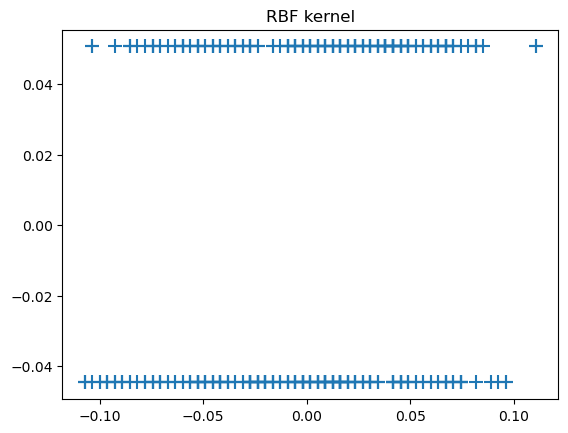

In [586]:
svc_model = svm.SVC(kernel='rbf')

svc_model.fit(X,y)
plt.title('RBF kernel')
#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(y_train, svc_model.predict(X_train))))
print("Testing accuracy : {}".format(metrics.accuracy_score(y_test, svc_model.predict(X_test))))
#plotting support vectors
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='+', edgecolors='g', zorder=10)
plt.show()

In [589]:
y_train_predict = svc_model.predict(X_train)

In [590]:
y_test_predict = svc_model.predict(X_test)

In [591]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

        25.0       0.00      0.00      0.00         1
        31.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         2
        40.0       0.00      0.00      0.00         1
        42.0       1.00      0.50      0.67         2
        43.0       0.00      0.00      0.00         1
        44.0       0.00      0.00      0.00         1
        45.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         2
        48.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         3
        50.0       0.00      0.00      0.00         1
        51.0       0.00      0.00      0.00         3
        52.0       0.00      0.00      0.00         1
        53.0       0.20      0.33      0.25         3
        54.0       0.00      0.00      0.00         1
        55.0       1.00      0.25      0.40         4
        57.0       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [592]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

        37.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         1
        48.0       0.00      0.00      0.00         2
        52.0       0.00      0.00      0.00         3
        53.0       0.00      0.00      0.00         1
        59.0       0.00      0.00      0.00         1
        60.0       0.00      0.00      0.00         2
        61.0       0.00      0.00      0.00         2
        63.0       1.00      0.33      0.50         3
        64.0       0.00      0.00      0.00         1
        65.0       1.00      1.00      1.00         1
        67.0       0.00      0.00      0.00         1
        68.0       0.00      0.00      0.00         1
        69.0       0.00      0.00      0.00         1
        70.0       0.00      0.00      0.00         1
        71.0       0.00      0.00      0.00         1
        72.0       0.14      1.00      0.24         4
        77.0       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [538]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svc_model, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   0.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.016 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.016 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.016 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.016 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.016 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.000 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.016 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.016 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.016 total time=   0.0s
[CV 4/5] END .....C=0.1, gam

[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.016 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.000 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.032 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.016 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.032 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.016 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.016 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.016 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.000 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.016 total time=   0.1s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.000 total time=   0.1s
[CV 2/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [539]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [540]:
# print hyper-parameter 
print(grid.best_estimator_)

SVC(C=100, gamma=1)


Training accuracy: 0.44983818770226536
Testing accuracy : 0.45112781954887216


C:\Users\Vishal.shah.LAMINAAR\AppData\Local\Temp\ipykernel_11512\3923366446.py:10: UserWarning: You passed a edgecolor/edgecolors ('g') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='+', edgecolors='g', zorder=10)


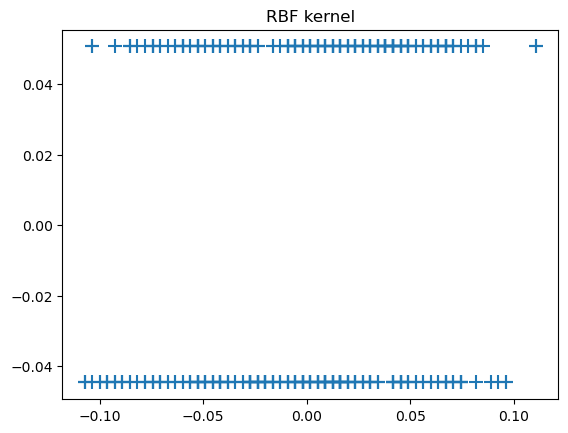

In [541]:
# using best parameters from hypertuning

svc_model = svm.SVC(kernel='rbf',C=100, gamma=1)

svc_model.fit(X,y)
plt.title('RBF kernel')
#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(y_train, svc_model.predict(X_train))))
print("Testing accuracy : {}".format(metrics.accuracy_score(y_test, svc_model.predict(X_test))))
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, marker='+', edgecolors='g', zorder=10)
plt.show()

In [542]:
y_train_predict = svc_model.predict(X_train)

In [543]:
y_test_predict = svc_model.predict(X_test)

In [544]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

        25.0       0.00      0.00      0.00         1
        31.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         0
        39.0       0.50      0.50      0.50         2
        40.0       1.00      1.00      1.00         1
        42.0       1.00      0.50      0.67         2
        43.0       0.00      0.00      0.00         1
        44.0       0.00      0.00      0.00         1
        45.0       1.00      1.00      1.00         1
        47.0       0.25      0.50      0.33         2
        48.0       0.33      1.00      0.50         1
        49.0       0.33      0.33      0.33         3
        50.0       1.00      1.00      1.00         1
        51.0       0.50      0.33      0.40         3
        52.0       0.00      0.00      0.00         1
        53.0       0.20      0.33      0.25         3
        54.0       0.00      0.00      0.00         1
        55.0       0.40    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [545]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

        37.0       1.00      1.00      1.00         1
        42.0       0.00      0.00      0.00         1
        48.0       0.50      1.00      0.67         2
        52.0       0.33      0.33      0.33         3
        53.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         0
        59.0       0.00      0.00      0.00         1
        60.0       1.00      0.50      0.67         2
        61.0       0.00      0.00      0.00         2
        63.0       1.00      0.33      0.50         3
        64.0       1.00      1.00      1.00         1
        65.0       0.50      1.00      0.67         1
        67.0       0.00      0.00      0.00         1
        68.0       0.00      0.00      0.00         1
        69.0       1.00      1.00      1.00         1
        70.0       0.00      0.00      0.00         1
        71.0       0.33      1.00      0.50         1
        72.0       0.36    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [ ]:
# 9. Based on the model hyper-parameters used in Q6 and Q8, 
# share your understanding of hyperparameters tuning in ML model development.

In [48]:
from sklearn.model_selection import train_test_split
X = df.loc[:,features]            # get the reduced features in the dataframe
y = df.loc[:,'diagnosis']              # perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size = 0.3,
                     shuffle = True,                                                    
                     random_state=random_state)log_reg = LogisticRegression()

SyntaxError: invalid syntax (1856623104.py, line 8)

In [ ]:
https://towardsdatascience.com/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e&hl=en&gl=in&strip=1&vwsrc=0